In [2]:
import pandas as pd

automobile_data = pd.read_csv('datasets/cars.csv', sep= r'\s*,\s*', engine='python')



In [3]:
automobile_data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
import numpy as np
automobile_data = automobile_data.replace('?', np.nan)
automobile_data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
automobile_data = automobile_data.dropna()

In [7]:
automobile_data.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,6,1,158,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,8,1,158,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,10,2,192,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [8]:
col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [9]:
automobile_target = automobile_data['price']
automobile_target.head()

3     13950
4     17450
6     17710
8     23875
10    16430
Name: price, dtype: object

In [11]:
automobile_features['horsepower'].describe()

count     159
unique     48
top        68
freq       18
Name: horsepower, dtype: object

In [14]:
pd.options.mode.chained_assignment = None

In [16]:
automobile_features['horsepower'] = pd.to_numeric(automobile_features['horsepower'])

In [17]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [18]:
automobile_target = automobile_target.astype('float')

In [20]:
automobile_target.describe()   

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [33]:
# Recreate the features DataFrame with the original categorical columns and scaled horsepower
automobile_features_df = pd.DataFrame({
	'horsepower': automobile_features.flatten(),
	'make': automobile_data['make'].values,
	'fuel-type': automobile_data['fuel-type'].values,
	'body-style': automobile_data['body-style'].values
})

automobile_features_df = pd.get_dummies(automobile_features_df, columns=['make', 'fuel-type', 'body-style'])
automobile_features_df.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0.201279,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.625812,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0.462530,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,1.442223,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.168622,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [35]:
automobile_features_df.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [24]:
from sklearn import preprocessing

In [37]:
automobile_features = preprocessing.scale(automobile_data[['horsepower']].astype(float))

In [41]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(automobile_features, automobile_target, test_size=0.2, random_state=0)


In [44]:
import torch 
dtype = torch.float

In [46]:
X_train_tensor = torch.tensor(X_train, dtype=dtype)
x_test_tensor = torch.tensor(X_test, dtype=dtype)
Y_train_tensor = torch.tensor(y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)


In [76]:
print(X_train_tensor.shape)
print(x_test_tensor.shape)
print(Y_train_tensor.shape)
print(y_test_tensor.shape)

torch.Size([127, 1])
torch.Size([32, 1])
torch.Size([159, 1])
torch.Size([32])


In [70]:
inp = 26
out = 1
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

model = torch.nn.Sequential(
    torch.nn.Linear(inp, hid),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hid, out)
)


In [71]:
# Convert boolean columns to float for model input
automobile_features_df_float = automobile_features_df.astype(float)
X_train_full_tensor = torch.tensor(automobile_features_df_float.values, dtype=dtype)
Y_train_tensor = torch.tensor(automobile_target.values, dtype=dtype).view(-1, 1)

for iter in range(10000):
    y_pred = model(X_train_full_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    if iter % 1000 == 0:
        print(f"Iteration {iter}, Loss: {loss.item()}")
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

Iteration 0, Loss: 165332576.0
Iteration 1000, Loss: 3729102.5
Iteration 2000, Loss: 2013246.25
Iteration 3000, Loss: 1486322.5
Iteration 4000, Loss: 1362024.625
Iteration 5000, Loss: 1284108.5
Iteration 6000, Loss: 1228118.5
Iteration 7000, Loss: 1197649.25
Iteration 8000, Loss: 1172781.625
Iteration 9000, Loss: 1150783.375


In [78]:
# Reindex automobile_features_df_float to match automobile_data's index
automobile_features_df_float.index = automobile_data.index

# Select the test rows from automobile_features_df_float using y_test's index
X_test_full = automobile_features_df_float.loc[y_test.index]
X_test_full_tensor = torch.tensor(X_test_full.values, dtype=dtype)

y_pred_tensor = model(X_test_full_tensor)


In [79]:
y_pred = y_pred_tensor.detach().numpy()

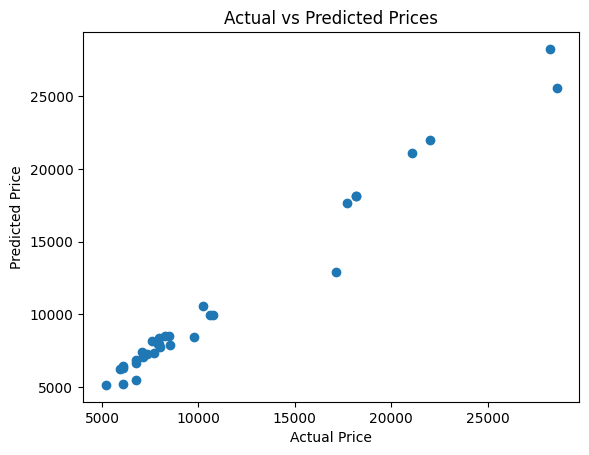

In [80]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [82]:
torch.save(model, 'my_model')
saved_model = torch.load('my_model', weights_only=False)

In [84]:
y_pred_tensor = saved_model(X_test_full_tensor)

In [85]:
y_pred = y_pred_tensor.detach().numpy()

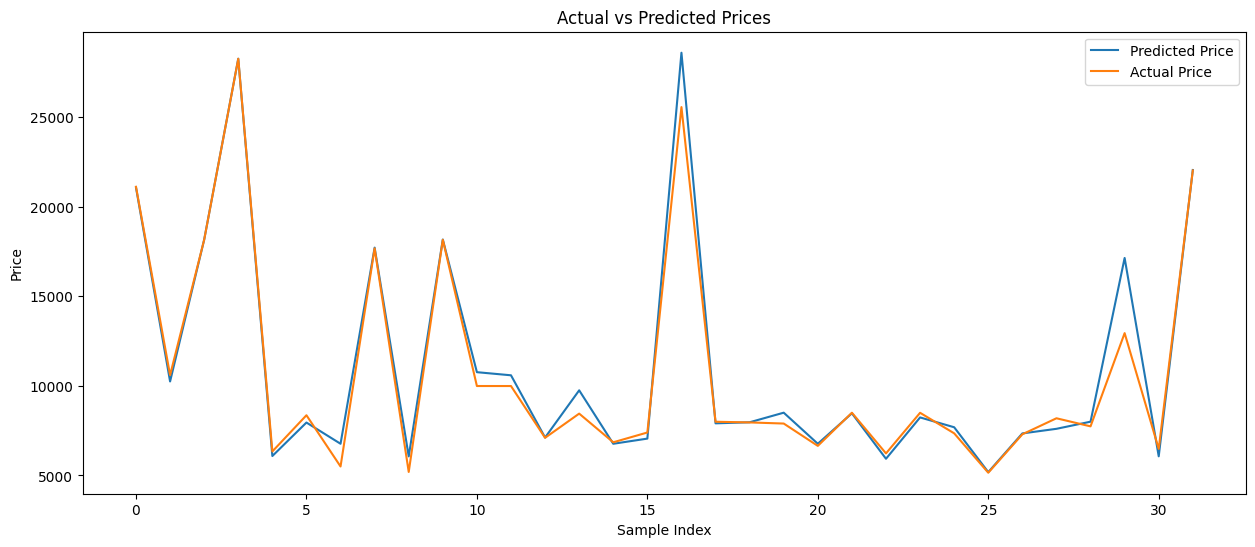

In [86]:
plt.figure(figsize=(15, 6))
plt.plot(y_pred, label = 'Predicted Price')
plt.plot(y_test.values, label = 'Actual Price')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()